Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from model_vision import BetaVAE
from model_memory import MDNRNN
from model_controller import ControllerEnv

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

beta = 100.0
inte = 11
name = "all"

# load vision model
vision_load_dir = "train_beta_vae"
vision_load_path = "{}/b{}_{}.json".format(vision_load_dir, beta, inte)
# load memory model
memory_load_dir = "train_rnn"
memory_load_path = "{}/b{}_{}_{}.json".format(memory_load_dir, beta, inte, name)

env = ControllerEnv(vae_load=vision_load_path, rnn_load=memory_load_path)

INFO:tensorflow:Model using gpu.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Model using gpu.


/home/beeperman/.conda/envs/wme/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

input dropout mode = False
output dropout mode = False
recurrent dropout mode = False


/home/beeperman/.conda/envs/wme/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


/home/beeperman/Projects/wme/objects/model_memory.py:237: RuntimeWarning: invalid value encountered in true_divide
  logmix2 /= logmix2.sum(axis=1).reshape(OUTWIDTH, 1)


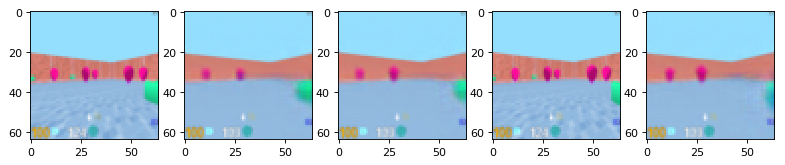

In [48]:
#env.reset()
action = np.array([0.0])
temperature = 0.01
img = []
img.append(env.obs.astype(np.float32)/255.0)
img.append(env.vae.decode([env.z])[0])
img.append(env.vae.decode([env.rnn.predict(env.z, action * env.action_scale, env.rnn_state, temperature=temperature)])[0])
env.step(action)
img.append(env.obs.astype(np.float32)/255.0)
#img.append(env.vae.decode([env.rnn.predict(env.z, action * env.action_scale, env.rnn_state, temperature=temperature)])[0])
img.append(env.vae.decode([env.z])[0])
#img.append(env.vae.decode([env.rnn.predict(env.z, action, env.rnn_state, temperature=temperature)])[0])

fig, ax = plt.subplots(1,5, figsize=(12,3), dpi=80)
for i in range(5):
    # TODO: plot something
    ax[i].imshow(img[i])
plt.show()

In [24]:
env.action_scale

0.4

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [6]:
obs.shape

(1734, 64, 64, 3)

In [7]:
vae = BetaVAE(z_size=z_size,
              batch_size=1,
              is_training=True,
              reuse=tf.AUTO_REUSE,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'b200.0_1.json'))

INFO:tensorflow:Model using cpu.


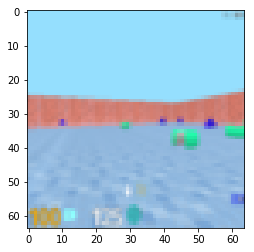

In [8]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])
plt.show()



In [9]:

batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)
z = np.copy(batch_z)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])
tt

[-0.746   1.3742  0.148  -0.2878  0.0578  0.0031 -1.113  -1.26    0.154   1.1472 -0.6629 -0.8037
 -0.4942  0.6802 -1.4247 -1.6009  1.122   0.32   -1.0504  0.2747 -1.0911 -1.281  -0.1604 -0.223
  0.3723 -1.0609  0.1787 -0.1144 -0.6051  0.2863  1.719  -0.5974  0.1956  0.5579 -0.0716 -0.1229
 -0.3874 -0.5949  0.0639  0.3988 -0.6025 -0.3369  1.6442  1.5215  0.7378 -0.6241 -0.8456  0.7705
  0.5249 -0.2492 -1.0451 -0.4032  1.2607  0.9827 -0.0159  0.321  -1.2995  0.1903 -1.2258  0.6595
  0.5112 -1.0389  0.8314 -0.5055]


array([[17.    ,  0.0157,  0.32  ],
       [19.    ,  0.0138,  0.2747],
       [20.    ,  0.0397, -1.0911],
       [21.    ,  0.0066, -1.281 ],
       [22.    ,  0.4507, -0.1604],
       [25.    ,  0.0144, -1.0609],
       [27.    ,  0.05  , -0.1144],
       [29.    ,  0.0148,  0.2863],
       [35.    ,  0.0007, -0.1229],
       [50.    ,  0.0011, -1.0451],
       [51.    ,  0.0018, -0.4032],
       [52.    ,  0.0002,  1.2607],
       [55.    ,  0.0033,  0.321 ],
       [63.    ,  0.0262, -0.5055]])

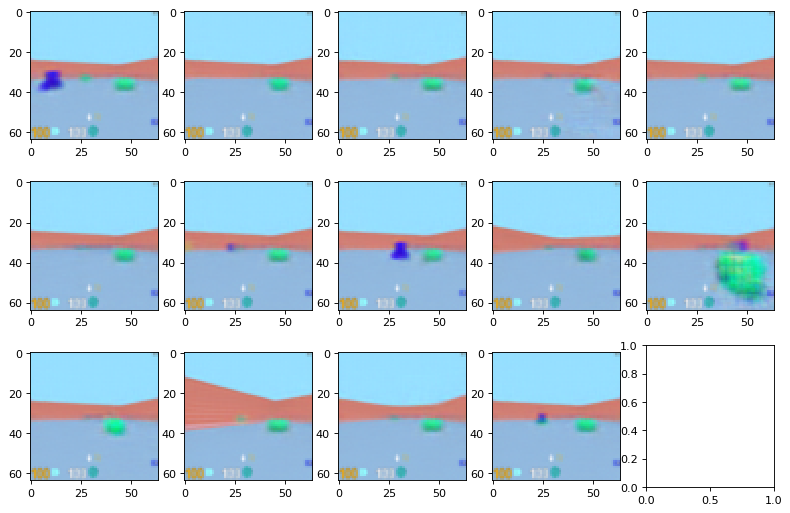

In [10]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b200.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] += i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

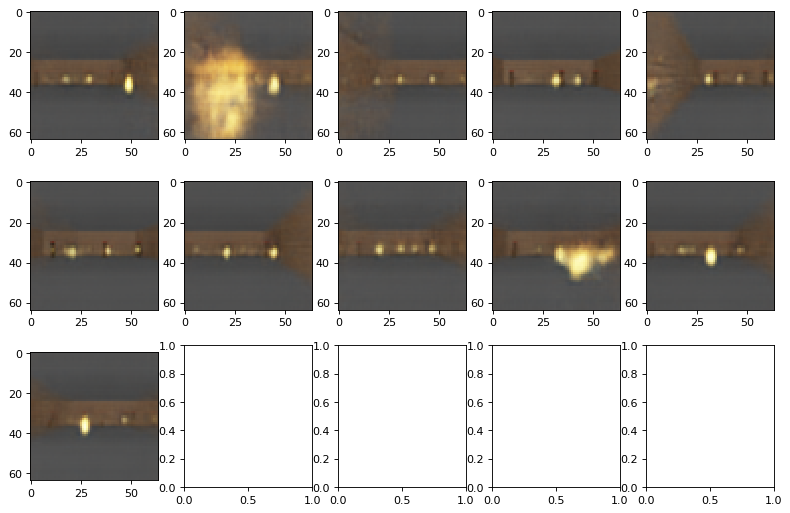

In [582]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b40.0_4.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

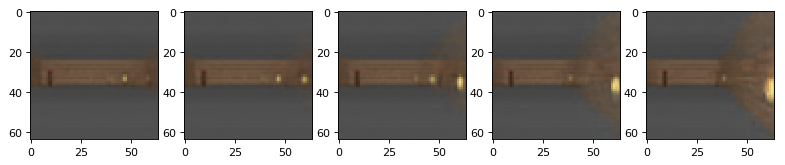

In [627]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'vae.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]


fig, ax = plt.subplots(1,5, figsize=(12,3), dpi=80)
for i in range(5):
    z = np.zeros_like(batch_z)
    z[0][index[5]] = -0 + 0.5 * i
    ax[i].imshow(vae.decode(z)[0])

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
plt.show()

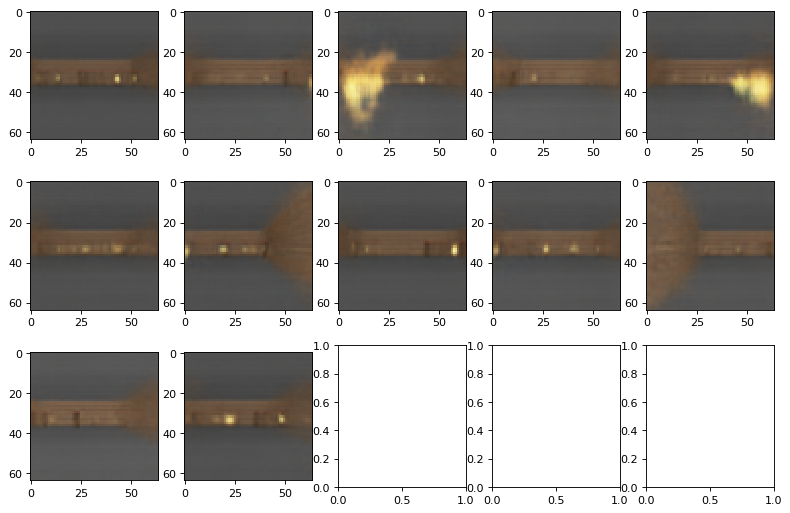

In [629]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b40.0_2.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

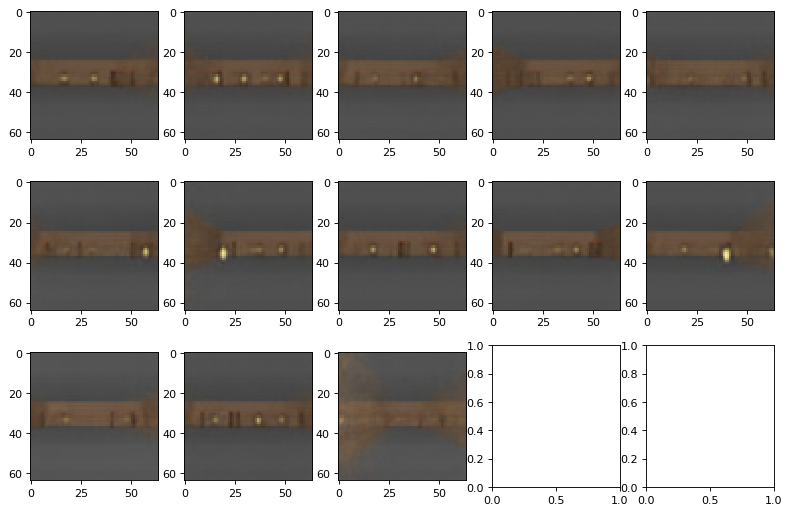

In [584]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b20.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

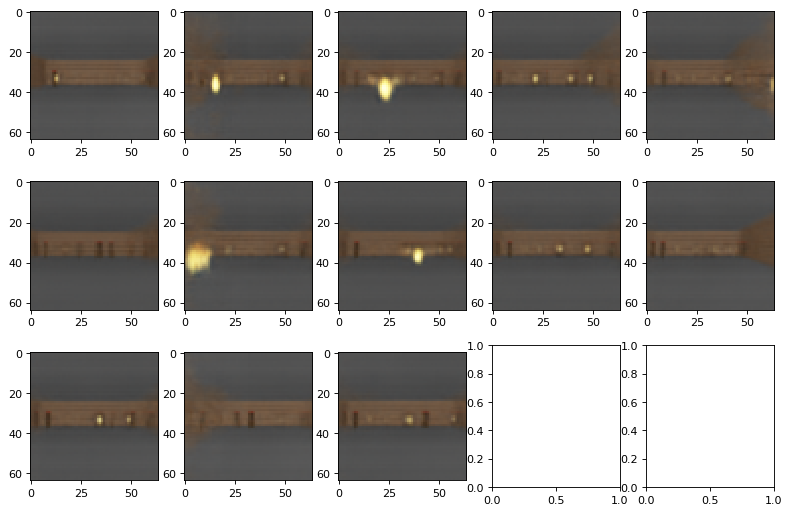

In [585]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b10.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())